In [81]:
import pandas as pd

In [82]:
df = pd.read_csv('MKT.csv')

In [83]:
print(df.dtypes)

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object


In [84]:
print(df.head())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


In [85]:
print(df.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


In [86]:
df.rename(columns={'youtube': 'Youtube', 'facebook':'Facebook', 'newspaper':'Newspaper', 'sales':'Sales'}, inplace=True)

In [87]:
print(df.head())

   Youtube  Facebook  Newspaper  Sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


### ANÁLISE DESCRITIVA

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

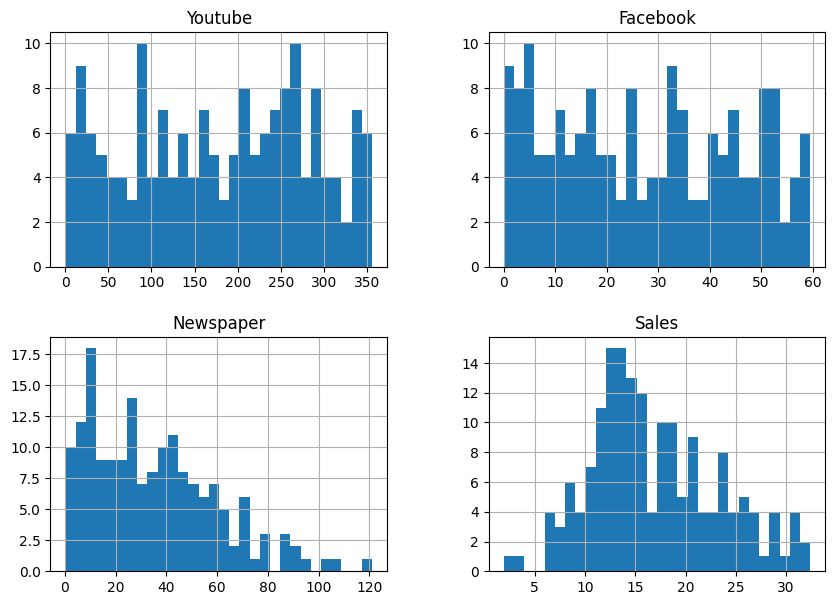

In [88]:
df.hist(bins=30, figsize=(10, 7))
plt.show()

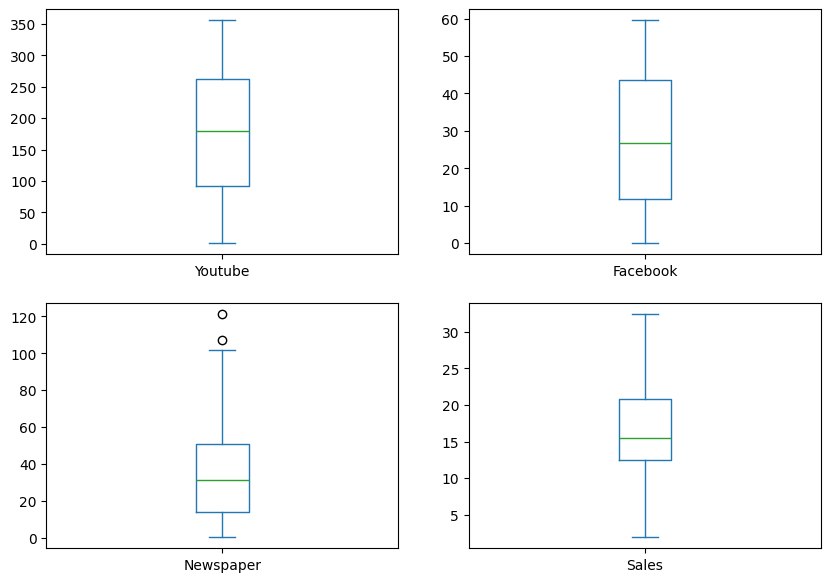

In [89]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,7))
plt.show()

### ANÁLISE EXPLORATÓRIA

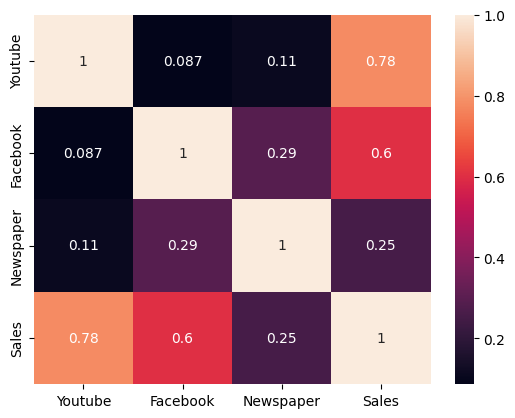

In [90]:
correlacoes = df.corr()
sns.heatmap(correlacoes, annot=True)
plt.show()

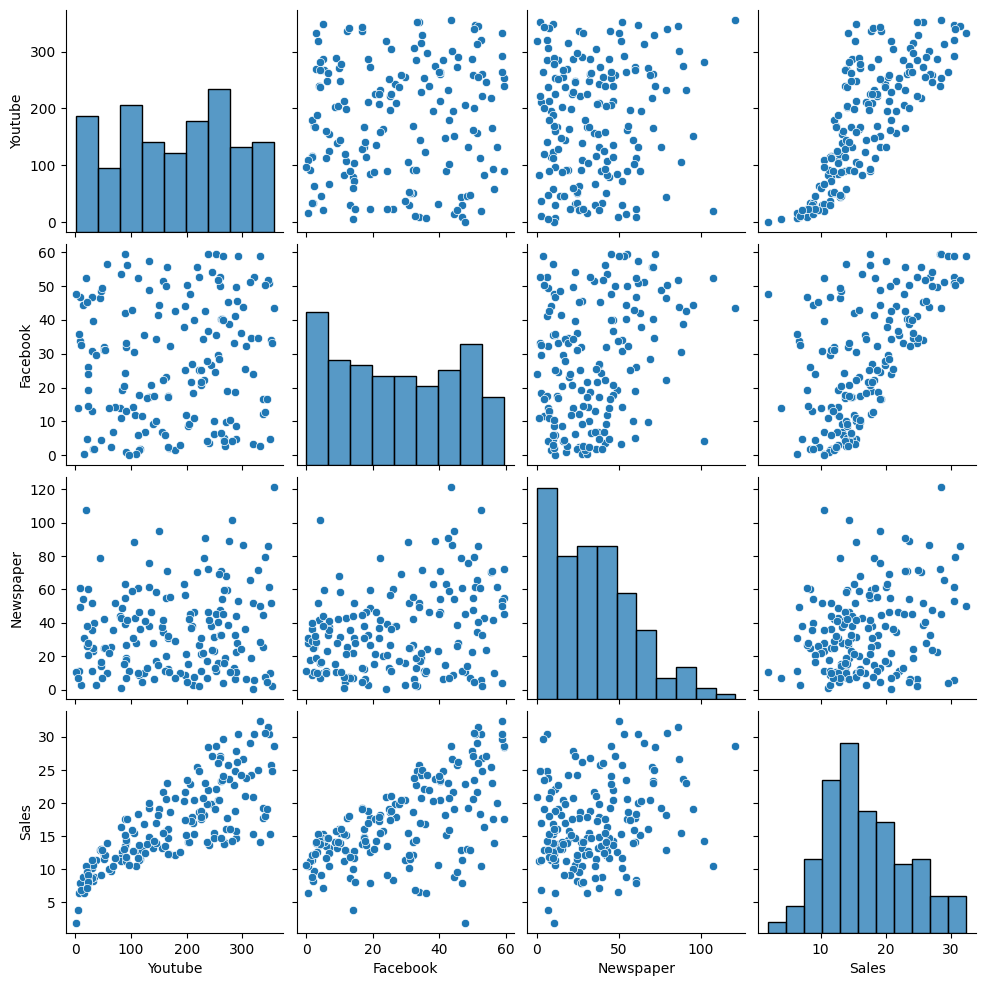

In [91]:
sns.pairplot(df)
plt.show()

### MODELAGEM

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
X = df[['Youtube', 'Facebook', 'Newspaper']]
y = df['Sales']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### CALCULANDO PREDIÇÃO

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
y_pred = modelo.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [99]:
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 5.576790234026713
R²: 0.872863085701216


In [100]:
# Exemplo de previsão para novos dados de investimento
novo_investimento = {'Youtube': [300], 'Facebook': [200], 'Newspaper': [50]}
novo_investimento_df = pd.DataFrame(novo_investimento)
previsao_vendas = modelo.predict(novo_investimento_df)
print(f'Previsão de vendas: {previsao_vendas[0]}')

Previsão de vendas: 55.85275545099547
